In [ ]:
 # importing libraries

'''import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize'''
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
netflix_data = pd.read_csv('/content/sample_data/netflix_reviews.csv')
netflix_data

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,ce452686-3ab6-4c02-b7c4-c95386050b92,Eli Mcdevitt,Gone downhill. Used to be able to stream anywh...,1,0,7.119.0 build 1 35583,2024-06-01 22:11:45,7.119.0 build 1 35583
1,68a4ebd3-e54f-4b3c-9d8a-05d6ee86f1c7,Minh Doan,The app is crashed sometimes. I have to log in...,1,1,8.116.0 build 8 50690,2024-06-01 22:10:30,8.116.0 build 8 50690
2,60fb6f3f-3a6f-4de8-8ff5-3f63627b3782,Faith 757,Netflix THE MOST EXPENSIVE STREAMING APP shoul...,3,0,8.116.0 build 8 50690,2024-06-01 21:58:42,8.116.0 build 8 50690
3,ee3c66d2-1e67-4949-bdd0-0c6251d63d5f,Hend Sami,Screen limit issue even though i triple checke...,1,0,NaN,2024-06-01 21:48:29,NaN
4,ef3eb2aa-b512-4465-8ef7-85a8c325d6cf,Trust Me,Nice 🙂,5,0,NaN,2024-06-01 21:39:57,NaN
...,...,...,...,...,...,...,...,...
111623,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
111624,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
111625,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
111626,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111628 entries, 0 to 111627
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              111628 non-null  object
 1   userName              111627 non-null  object
 2   content               111626 non-null  object
 3   score                 111628 non-null  int64 
 4   thumbsUpCount         111628 non-null  int64 
 5   reviewCreatedVersion  95513 non-null   object
 6   at                    111628 non-null  object
 7   appVersion            95513 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.8+ MB


In [ ]:
netflix_data.isnull().sum()

reviewId                    0
userName                    1
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    16115
at                          0
appVersion              16115
dtype: int64

In [ ]:
netflix_data.dropna(inplace=True)

In [ ]:
netflix_data.isnull().sum()

reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64

In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95512 entries, 0 to 111626
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              95512 non-null  object
 1   userName              95512 non-null  object
 2   content               95512 non-null  object
 3   score                 95512 non-null  int64 
 4   thumbsUpCount         95512 non-null  int64 
 5   reviewCreatedVersion  95512 non-null  object
 6   at                    95512 non-null  object
 7   appVersion            95512 non-null  object
dtypes: int64(2), object(6)
memory usage: 6.6+ MB


In [ ]:
netflix_data = netflix_data.drop(columns=['reviewId', 'userName', 'reviewCreatedVersion', 'at', 'appVersion'])

In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95512 entries, 0 to 111626
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        95512 non-null  object
 1   score          95512 non-null  int64 
 2   thumbsUpCount  95512 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.9+ MB


In [ ]:
netflix_data

,content,score,thumbsUpCount
0,Gone downhill. Used to be able to stream anywh...,1,0
1,The app is crashed sometimes. I have to log in...,1,1
2,Netflix THE MOST EXPENSIVE STREAMING APP shoul...,3,0
5,Dont get it in ur phone,1,0
6,Still having an issue with closed captions tur...,4,7
...,...,...,...
111620,How can I delete one of the users? Please. Hel...,3,0
111621,Good app in easy to use,5,0
111622,Everytime I watch a show it goes so dark so I ...,1,0
111624,I love Netflix. I always enjoy my time using it.,5,0


In [ ]:
corr_data = netflix_data.drop('content', axis=1)
corr_data

,score,thumbsUpCount
0,1,0
1,1,1
2,3,0
5,1,0
6,4,7
...,...,...
111620,3,0
111621,5,0
111622,1,0
111624,5,0


In [ ]:
corr_data.corr()

,score,thumbsUpCount
score,1.000000,-0.013135
thumbsUpCount,-0.013135,1.000000


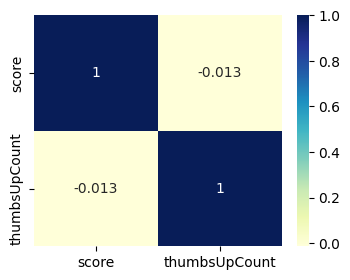

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(corr_data.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [ ]:
netflix_data = netflix_data.drop(columns=['thumbsUpCount'])

In [ ]:
netflix_data

,content,score
0,Gone downhill. Used to be able to stream anywh...,1
1,The app is crashed sometimes. I have to log in...,1
2,Netflix THE MOST EXPENSIVE STREAMING APP shoul...,3
5,Dont get it in ur phone,1
6,Still having an issue with closed captions tur...,4
...,...,...
111620,How can I delete one of the users? Please. Hel...,3
111621,Good app in easy to use,5
111622,Everytime I watch a show it goes so dark so I ...,1
111624,I love Netflix. I always enjoy my time using it.,5


In [ ]:
netflix_data.loc[netflix_data.score==5]

,content,score
12,Nice,5
17,"Great show selection as well as movies, if onl...",5
29,awesome,5
34,My fav ott platform🤌🏻❤️ love it,5
35,High tention,5
...,...,...
111614,I love the app and it's services but PLEASE ST...,5
111615,The best but I wish they did split payments...,5
111618,"how it work so fast, java? what combintaion of...",5
111621,Good app in easy to use,5


In [ ]:
netflix_data.content[0]

'Gone downhill. Used to be able to stream anywhere. Now it wants to send an email everytime im travelling. Junk.'

In [ ]:
# Tokenizing

for sentences in range(len(netflix_data)):
  pass
sentence = sent

['The app is crashed sometimes.', 'I have to log in and download everything all over again.', 'What a frustrated 😠.', "My device is L1 , but after crashing, it's L3, so I can't watch movies in HD."]
